<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/NEURAL_PHOTO_EDITING_WITH_INTROSPECTIVE_ADVERSARIAL_NETWORKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NEURAL PHOTO EDITING WITH INTROSPECTIVE ADVERSARIAL NETWORKS**

논문 링크: https://arxiv.org/abs/1609.07093

VAE와 GAN은 둘다 image 생성에서 큰 가능성을 보여줬다. 하지만 이러한 모델들이 범용 image 편집기로 사용하기 전에는 해결해야할 점이 있다. 먼저 두 model의 장점과 단점을 보면, VAE의 경우 안정적이지만 detail한 부분을 버리는 경향이 있다. 반면 GAN의 경우 불안정적이지만 선명하고 사실적인 image를 잘 생성한다.

latent-variable generative model을 사용할시 두 가지의 문제가 발생한다.

첫번째는 model이 latents를 통해 정확한 재구성을 할 수 있어야 한다. 이는 information bottleneck의 크기에 따라 달라지는 재구성 정확도와 학습된 feature quality에 trade-off 관계가 있기 때문에 inference mechanism와 model architecture의 신중한 설계가 필요하다.

두번째는 사용자가 model의 latent variables를 조작할 수 있어야 한다. 즉, "not smiling/smiling" 등을 사용자가 조정하여 그에 따른 결과물이 나와야 한다.

## **Neural Photo Editor**

따라서 본 논문에서는 이러한 두 문제를 모두 처리할 수 있는 interface인 **Neural Photo Editor**를 제안한다. "contextual paintbrush"를 활용하여 latent vector를 간접적으로 조작하여 output에 변경을 줄 수 있다.

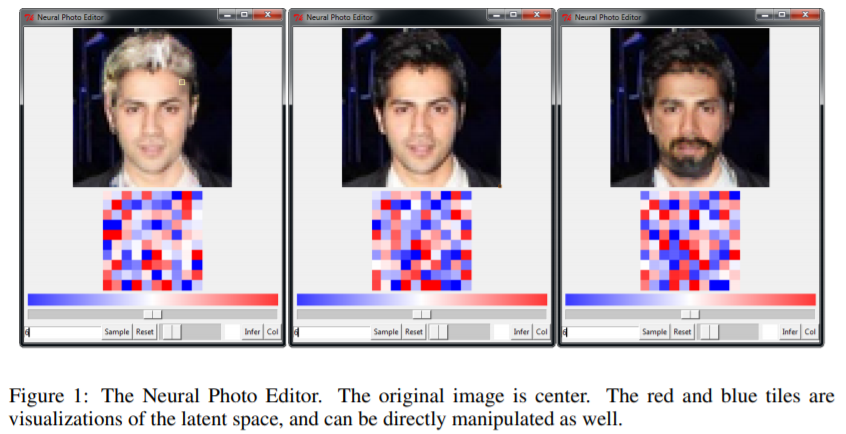

위의 그림 Figure 1은 "contextual paintbrush"로 latent space를 간접적으로 조작하여 사용자의 input을 보다 고품질의 사실적인 image로 반환해준 것을 보여준다.

핵심 아이디어는 간단한데 사용자가 paint brush의 size와 color를 선택하여 output image에 페인트를 한다. **개별 pixel을 변경하는 대신 local image patch와 사용자로부터 요청된 color 간의 차이를 backpropagation을 진행하여 최소화**한다. output image X^와 사용자가 요청한 색상 X_user거 주어지면 latent value는 -d||X_user - X^||_2 / dZ가 된다.

예를 들어 사용자가 밝은 피부, 검은 머리카락, widow’s peak(V 모양의 헤어 라인)을 가진 사람의 이미지가 있다고 가정을 하겠다. 이때 사용자가 이미지의 이마 부분에 검은색을 칠하면 자동으로 머리카락이 추가되는 것이다.

이 기술은 network에 의해 생성된 sample을 탐색할 수 있지만, 이것을 바로 기존 image에 직접 적용시 실패한다. 그 이유는 latent에 완전히 제어가 되는 image에 의존을 하는 것이기 때문에 재구성(reconstruction)이 일반적으로 불완전하다.

따라서 본 논문에서는 간단라서 본 논문에서는 간단한 masking 기술을 도입하여 이를 회피했다.

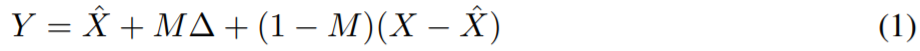

output image에 사용자가 요구한 pixel-wise changes와 reconstruction error의 masking된 combination를 합해준다. 위의 식에서 X는 원본 image이고, X^는 재구성된 X이며, ∆는 X와 X^의 차이다.

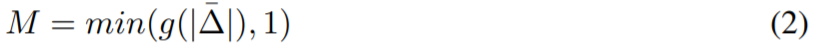

그리고 mask M은 ∆의 절대값에 대한 채널별 평균이며 Gaussian filter g로 평활화되며 0 ~ 1사이의 값이 되도록 truncated된다.

mask는 magnitude에 따라 reconstruction이 변경되게 한다. 이렇게 하면 재구성이 완벽한 pixel을 요구하는 것이 아닌 feature-aligned를 요구함으로 정확도 제약이 훨씬 완화가 된다.

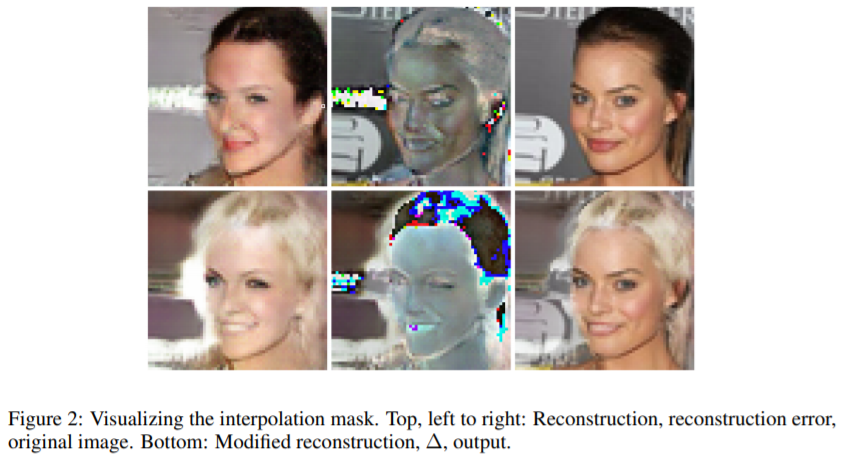

위의 그림 Figure 2는 masking 기술의 시각화를 나타낸 것이다.

## **Introspective Adversarial Network**

본 논문에서는 Neural Photo Editor를 좀 더 보완하기 위해 VAE와 GAN을 결합한 특징들을 잘 표현하는 고품질의 이미지 모델인 IAN(Introspective Adversarial Network)를 제안한다.

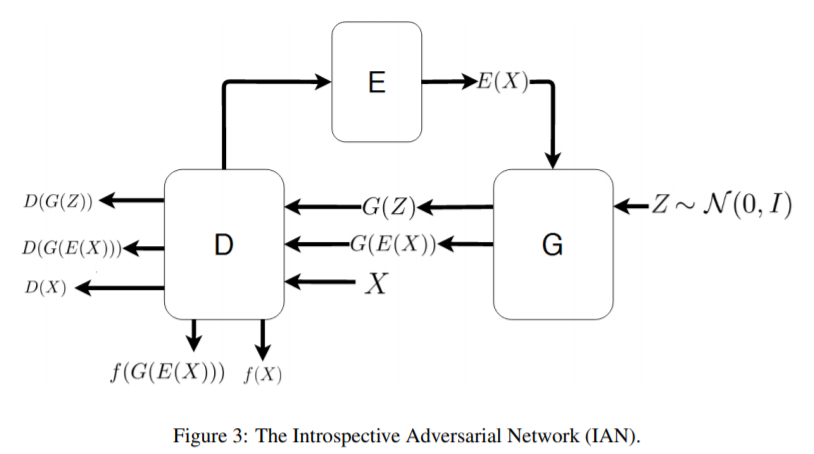

일반적은 고차원의 latent space은 desciptive feature를 덜 배우는 경향이 있지만, 더 높은 고품질의 재구성을 생성한다. 따라서 **IAN은 latent space의 차원을 증가시키는 것이 아닌 용량(capacity)를 증가**시키는 방법을 찾는다.


위의 그림 Figure 3과 같이 GAN의 generator를 autoencoder의 decoder를 사용하며, 별도의 단순한 discriminator를 train하는 것이 아닌 encoder와 discriminator를 single network로 결합하여 train을 진행한다. 

Neural Photo Editor는 고품질의 reconstruction의 핵심인 inference capacity 능력을 향상시키기 위하여 discriminator와 fully-connected layer로 연결된 subnetwork E를 사용한다. 그리고 reconstruction을 위하여 Z ~ E(x) = q(Z|X)를 추론하고 generator에서 random값 Z ~ p(z)를 sampling한다. 

### **Architecture**

IAN의 기본적인 구조는 DCGAN과 동일하며, 추가적으로 generator에 **MDC(Multiscale Dilated Convolution)** blocks를 적용하고 discriminator에는 Minibatch Discrimination를 적용했다.

### **Multiscale Dilated Convolution (MDC) block**

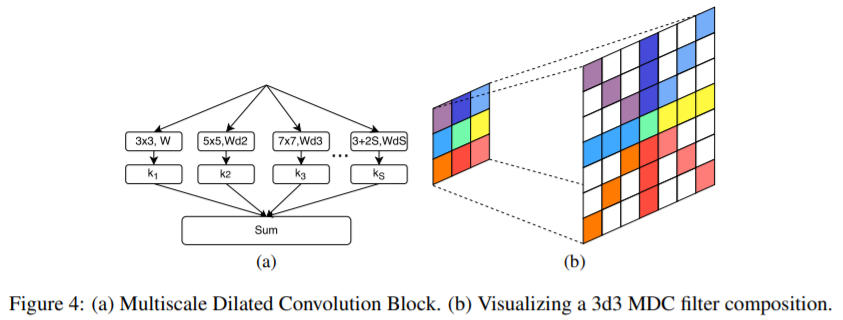

generator에 Inception-styled의 convolutional block 즉, MDC를 적용한다. MDC block이란, 위의 그림 Figure 4의 (a) 부분과 같이 여러 확장 인자에 single filter를 적용한 다음 확장된 각 filter의 output에 대해 weight가 적용된 요소별 합을 구한다. 이때 parameter는 최소한만 증가한다.

코드가 궁금하면 https://github.com/ajbrock/Neural-Photo-Editor/blob/d234cf1f80cf8c8f621f871dc704dc43e212201f/layers.py#L207 링크를 참고하면 된다. (본 논문 저자의 코드는 모두 Theano와 Lasagne로 구현이 되어있다.)

### **Orthogonal Regularization**

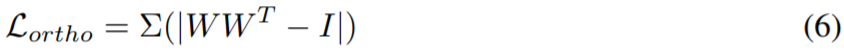

orthogonality는 기존 matrix의 norm을 변경하지 않기 때문에 convnet에 매우 바람직하다. 따라서 orthogonal matrices를 사용하여 weight를 초기화하는 orthogonal regularization을 도입한다. 수식은 위의 식과 같다. W는 filter bank이며, I는 identity matrix이다.

### **Loss function**

VAE/GAN 및 **DeePSIM**과 유사하게 세 가지의 loss function을 사용한다.
첫번째는 L_img로 pixel-wise reconstruction loss이다. 두번째는 L_feature로 feature-wise reconstruction loss이다. 세번째는 L_adv로 ternary adversarial loss이다.

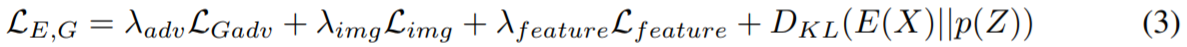

또한 VAE의 KL divergence를 추가함으로써 최종적인 loss는 위와 같이 된다. λ의 경우는 각 loss의 상대적인 중요성에 대한 가중치이다. 본 논문에서는 λ_img는 3으로 설정하고 나머지 λ는 1로 설정하였다.

## **Experiments**

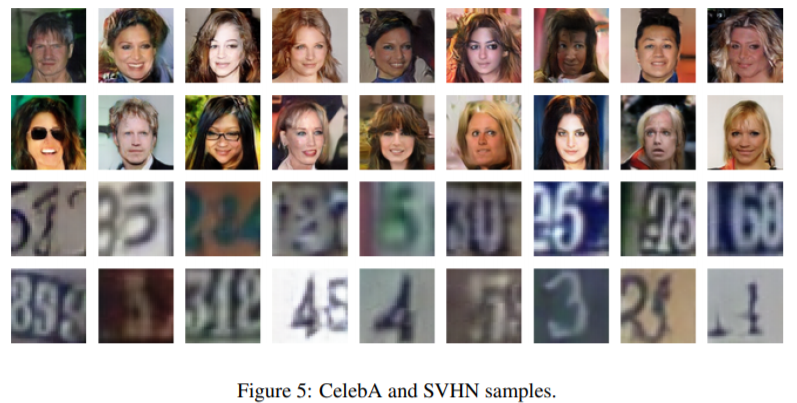

위의 그림 Figure 5는 무작위 선택된 IAN의 samples이다.

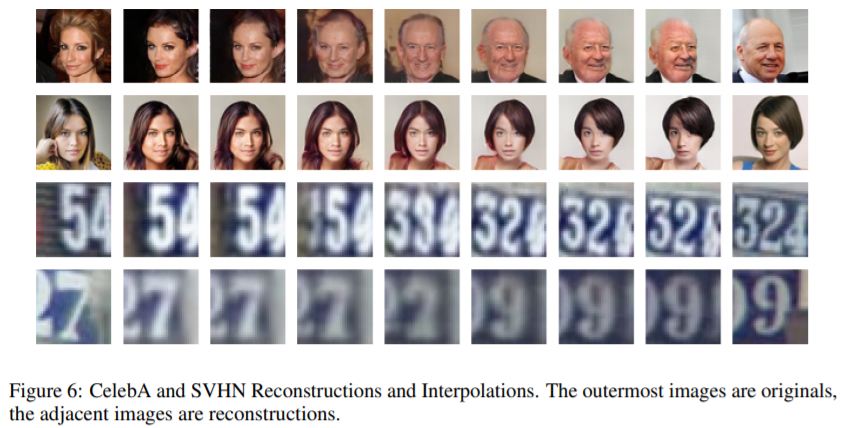

위의 그림 Figure 6은 이전에 볼 수 없었던 data에 대해 IAN의 고품질 재구성을 보여준다.

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('https://www.youtube.com/watch?v=FDELBFSeqQs', width=600, height=480)

사실 결과물은 위의 영상을 보면 될거 같다.